In [1]:
#from __future__ import print_function, division
from builtins import range, input
import random
from sklearn.model_selection import train_test_split
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import datasets
import import_ipynb
from sklearn import metrics
weight_list=[]
from sklearn.linear_model import LogisticRegression

class AdaBoost:
  def __init__(self, M):
    self.M = M

  def fit(self, X, Y):
    self.models = []
    self.alphas = []

    N, _ = X.shape
    W = np.ones(N) / N

    for m in range(self.M):
      tree =DecisionTreeClassifier(max_depth=1)
      tree.fit(X,Y,sample_weight=W)
      P = tree.predict(X)

      err = W.dot(P != Y)
      alpha = 0.5*(np.log(1 - err) - np.log(err))

      W = W*np.exp(-alpha*Y*P) # vectorized form
      W = W / W.sum() # normalize so it sums to 1
      weight_list.append(W)

      self.models.append(tree)
      self.alphas.append(alpha)

  def predict(self, X):
    # NOT like SKLearn API
    # we want accuracy and exponential loss for plotting purposes
    N, _ = X.shape
    FX = np.zeros(N)
    for alpha, tree in zip(self.alphas, self.models):
      FX += alpha*tree.predict(X)
    return np.sign(FX), FX

  def score(self, X, Y):
    # NOT like SKLearn API
    # we want accuracy and exponential loss for plotting purposes
    P, FX = self.predict(X)
    L = np.exp(-Y*FX).mean()
    return np.mean(P == Y), L





if __name__ == '__main__':
    cancer=datasets.load_breast_cancer()
    X=cancer.data
    Y=cancer.target
    Y[Y == 0] = -1
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3,random_state=109) # 70% training and 30% test
   # make the targets -1,+1
    per=(Ytrain.shape[0])*(10/100) #20% data will be mislabeled

    k=random.sample(range(Ytrain.shape[0]), int(per)) #list of index no. of mislabeled data
    Ytrain=np.array(Ytrain)
    for i in k:
        if Ytrain[i-1]==1:
            Ytrain[i-1]=-1;
        else:
            Ytrain[i-1]=1
#mislabeled data created here till now
    itr=10
    model = AdaBoost(itr)
    model.fit(Xtrain, Ytrain)

In [2]:
weight_list=np.array(weight_list)
weight_list=np.transpose(weight_list)

In [3]:
a=len(weight_list)
nm=weight_list[:,itr-1]

In [4]:
Q=[]
x=[]
for i in range(a):
    x=[i,nm[i]]
    Q.append(x)
    x=[]
Q.sort(key = lambda Q: Q[1]) 


In [5]:
mis=[]
for i in k:
    mis.append(nm[i])

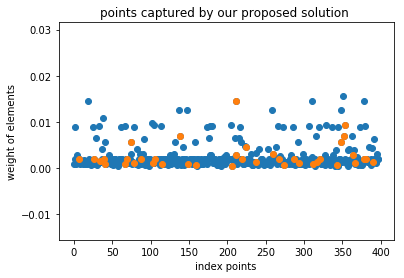

In [6]:
plt.scatter(range(a),nm)
plt.scatter(k,mis)
plt.xlabel("index points")
plt.ylabel("weight of elements")
plt.title("points captured by our proposed solution ")
plt.show()

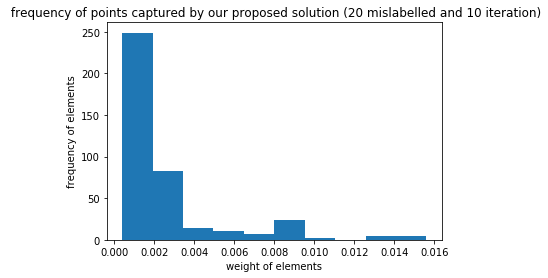

In [7]:
plt.xlabel("weight of elements")
plt.ylabel("frequency of elements")
plt.title(" frequency of points captured by our proposed solution (20 mislabelled and 10 iteration)")

plt.hist(nm)
plt.show()

In [8]:
#finding 4th quartile
a=len(nm)
a2=(a/100)*75
a3=(a/100)*88

#3rd quartile
m3=[]
index3=[]
inderdash=[]
for i in range(int(a2),a):
    m3.append(Q[i])
for j in m3:
    index3.append(j[0])

#4th quartile
m4=[]
index4=[]
inderdash=[]
for i in range(int(a3),a):
    m4.append(Q[i])
for j in m4:
    index4.append(j[0])

In [9]:
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    
    if (a_set & b_set): 
        wq=a_set & b_set 
    else: 
        print("No common elements")  
    return wq

In [10]:
wq1=common_member(k,index4)
wq2=common_member(k,index3)
print(len(wq1))
print(len(wq2))
print(len(k))
print("3rd quartile",len(index3))
print("4th quartile",len(index4))

5
11
39
3rd quartile 100
4th quartile 48


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [12]:

clf = SVC(kernel='linear') 

clf1 = KNeighborsClassifier() 

clf2 = DecisionTreeClassifier() 

clf3 = GaussianNB() 


cancer=datasets.load_breast_cancer()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109)
clf.fit(X_train, y_train)
y_pred_mis = clf.predict(X_test)
clf1.fit(X_train, y_train)
y_pred_mis1 = clf1.predict(X_test)
clf2.fit(X_train, y_train)
y_pred_mis2 = clf2.predict(X_test)
clf3.fit(X_train, y_train)
y_pred_mis3 = clf3.predict(X_test)


print(metrics.accuracy_score(y_test, y_pred_mis))
print(metrics.accuracy_score(y_test, y_pred_mis1))
print(metrics.accuracy_score(y_test, y_pred_mis2))
print(metrics.accuracy_score(y_test, y_pred_mis3))

0.9649122807017544
0.9649122807017544
0.9415204678362573
0.9532163742690059


In [14]:
per=(y_train.shape[0])*(10/100) #20% data will be mislabeled

k=random.sample(range(y_train.shape[0]), int(per)) #list of index no. of mislabeled data
y_train=np.array(y_train)
for i in k:
    if y_train[i-1]==1:
        y_train[i-1]=0;
    else:
        y_train[i-1]=1

In [15]:
print(y_train)

[0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0
 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0
 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1
 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0
 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1
 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1
 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1]


In [16]:
clf.fit(X_train, y_train)
y_pred_mis = clf.predict(X_test)
clf1.fit(X_train, y_train)
y_pred_mis1 = clf1.predict(X_test)
clf2.fit(X_train, y_train)
y_pred_mis2 = clf2.predict(X_test)
clf3.fit(X_train, y_train)
y_pred_mis3 = clf3.predict(X_test)


print(metrics.accuracy_score(y_test, y_pred_mis))
print(metrics.accuracy_score(y_test, y_pred_mis1))
print(metrics.accuracy_score(y_test, y_pred_mis2))
print(metrics.accuracy_score(y_test, y_pred_mis3))

0.9649122807017544
0.9532163742690059
0.8654970760233918
0.9415204678362573


In [35]:
model=LogisticRegression()

## 3r quartile result start from here

In [36]:
x=[]
y=[]
for i in range(X_train.shape[0]):
    if i not in index3:
        x.append(X_train[i])
        y.append(y_train[i])

In [37]:
x=np.array(x)
y=np.array(y)

In [54]:
#for 3rd quartile
model=model.fit(x,y)
probs = model.predict_proba(Xtest)
scores_3 = probs[:,1]
# print(scores_3)
print(len(Ytest))
fpr_3, tpr_3, thresholds_3 = metrics.roc_curve(Ytest, scores_3, pos_label=2)
print(fpr_3)

171
[0.         0.00584795 0.57894737 0.85380117 1.        ]


/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


## accuracy of all four model with removing the cilprit points

In [39]:
clf.fit(x, y)
y_pred_mis = clf.predict(X_test)
clf1.fit(x, y)
y_pred_mis1 = clf1.predict(X_test)
clf2.fit(x, y)
y_pred_mis2 = clf2.predict(X_test)
clf3.fit(x, y)
y_pred_mis3 = clf3.predict(X_test)


print(metrics.accuracy_score(y_test, y_pred_mis))
print(metrics.accuracy_score(y_test, y_pred_mis1))
print(metrics.accuracy_score(y_test, y_pred_mis2))
print(metrics.accuracy_score(y_test, y_pred_mis3))

0.9766081871345029
0.9532163742690059
0.8654970760233918
0.9473684210526315


## accuracy after fliping the culprit points

In [40]:
x=[]
y=[]
for i in range(X_train.shape[0]):
    if i not in index4:
        x.append(X_train[i])
        y.append(y_train[i])
        

In [41]:
print(len(x))

350


In [42]:
x=np.array(x)
y=np.array(y)

#for 3rd quartile
model=model.fit(x,y)
probs = model.predict_proba(Xtest)
scores_4 = probs[:,1]
fpr_4, tpr_4, thresholds_4 = metrics.roc_curve(Ytest, scores_4, pos_label=2)
clf.fit(x, y)
y_pred_mis = clf.predict(X_test)
clf1.fit(x, y)
y_pred_mis1 = clf1.predict(X_test)
clf2.fit(x, y)
y_pred_mis2 = clf2.predict(X_test)
clf3.fit(x, y)
y_pred_mis3 = clf3.predict(X_test)


print(metrics.accuracy_score(y_test, y_pred_mis))
print(metrics.accuracy_score(y_test, y_pred_mis1))
print(metrics.accuracy_score(y_test, y_pred_mis2))
print(metrics.accuracy_score(y_test, y_pred_mis3))


/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


0.9824561403508771
0.9649122807017544
0.8654970760233918
0.9415204678362573


## score calculation

In [43]:
X=cancer.data
Y=cancer.target
# Y[Y == 0] = -1
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3,random_state=109)

#for real case
model=SVC(probability=True)
model=model.fit(Xtrain,Ytrain)
probs = model.predict_proba(Xtest)
scores = probs[:,1]
# print(scores)

fpr, tpr, thresholds = metrics.roc_curve(Ytest, scores, pos_label=2)

for i in k:
    if Ytrain[i-1]==1:
        Ytrain[i-1]=-1;
    else:
        Ytrain[i-1]=1


#for mislabel
model=model.fit(Xtrain,Ytrain)
probs = model.predict_proba(Xtest)
scores_m = probs[:,1]
fpr_m, tpr_m, thresholds_m = metrics.roc_curve(Ytest, scores_m, pos_label=2)





/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc = metrics.auc(fpr, tpr)

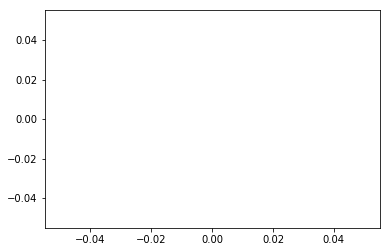

In [50]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)